# [Problem 1] Understanding the content of the competition

## What kind of company is Home Credit?
Home Credit is an international consumer finance provider with operations in 9 countries. They focus on responsible lending primarily to people with little or no credit history.

## What is expected in this competition?
To to predict clients repayment abilities.

## What are the benefits companies can gain by predicting this?
To ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

# [Problem 2] Understanding the overview of data

<div class = "alert alert-info">
<h2>Overview </h2>
</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
application_train = pd.read_csv('application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
application_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [3]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**There are 121 parameters as well as 307511 samples in order to predict the target variable**

<div class = "alert alert-danger">
<h2>Missing values </h2>
</div>

<div class = "alert alert-danger>
<h1>Missing value </h1>
</div>

In [5]:
application_train.isnull().sum().to_frame()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


## Percentage of missing values per column

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (121).

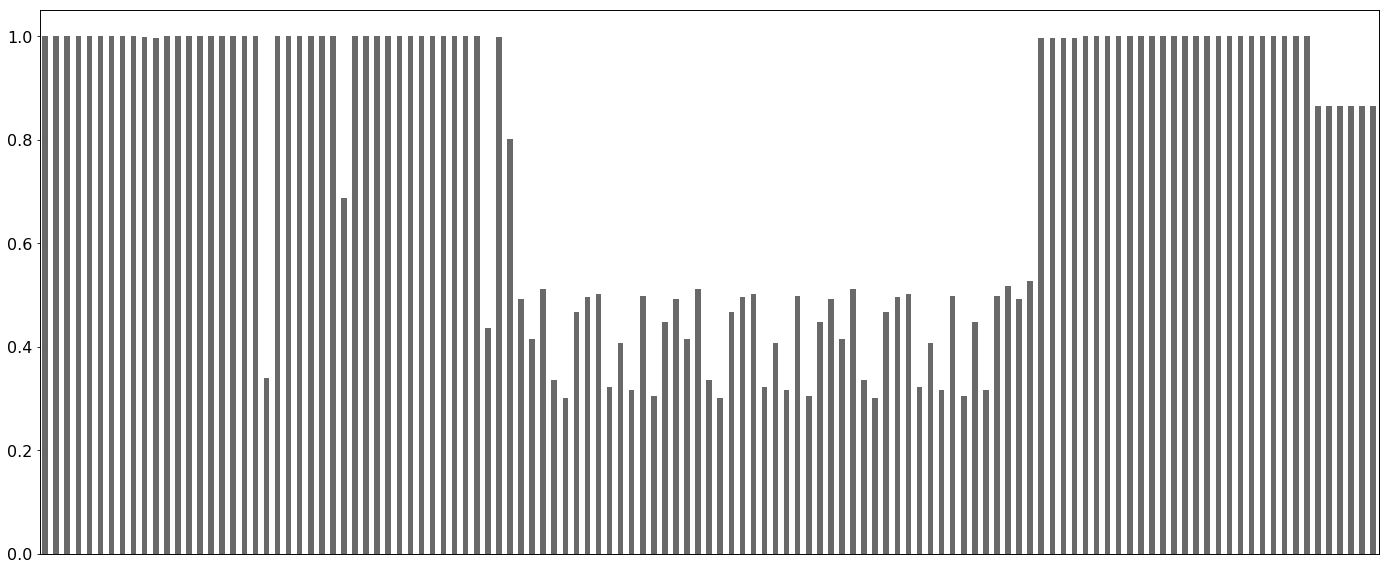

In [6]:
import missingno as ms
ms.bar(application_train.drop('TARGET', 1))

# [Problem 3] Defining issues

1. Missing ratio
2. Target value overview
2. Correlation coefficient matrix
3. Top 5 features that have a high correlation with the target variable
4. DAYS_BIRTH
5. REGION_RATING_CLIENT_W_CITY	
6. REGION_RATING_CLIENT
7. DAYS_LAST_PHONE_CHANGE
8. DAYS_ID_PUBLISH
9. REG_CITY_NOT_WORK_CITY
10. FLAG_EMP_PHONE
11. REG_CITY_NOT_LIVE_CITY
12. FLAG_DOCUMENT_3	
13. DAYS_REGISTRATION

# [Problem 4] Data exploration

## 1. Missing ratio

In [7]:
missing_ratio = pd.concat([application_train.count(), application_train.isnull().sum(), (application_train.isnull().sum()/application_train.count())], 1)
missing_ratio.columns = ['Total values', 'Missing values', 'Missing ratio']
missing_ratio

,Total values,Missing values,Missing ratio
SK_ID_CURR,307511,0,0.000000
TARGET,307511,0,0.000000
NAME_CONTRACT_TYPE,307511,0,0.000000
CODE_GENDER,307511,0,0.000000
FLAG_OWN_CAR,307511,0,0.000000
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,0.156091
AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,0.156091
AMT_REQ_CREDIT_BUREAU_MON,265992,41519,0.156091
AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,0.156091


## 2. Target value overview
**Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in the company sample, 0 - all other**

<AxesSubplot:ylabel='TARGET'>

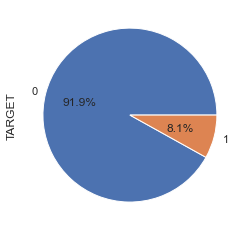

In [8]:
sns.set()
application_train['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%')

According to the pie chart, only 8.1% of clients have payment difficulties. This result is a good new because this percentage is quite low.

## 3. Correlation coefficient matrix

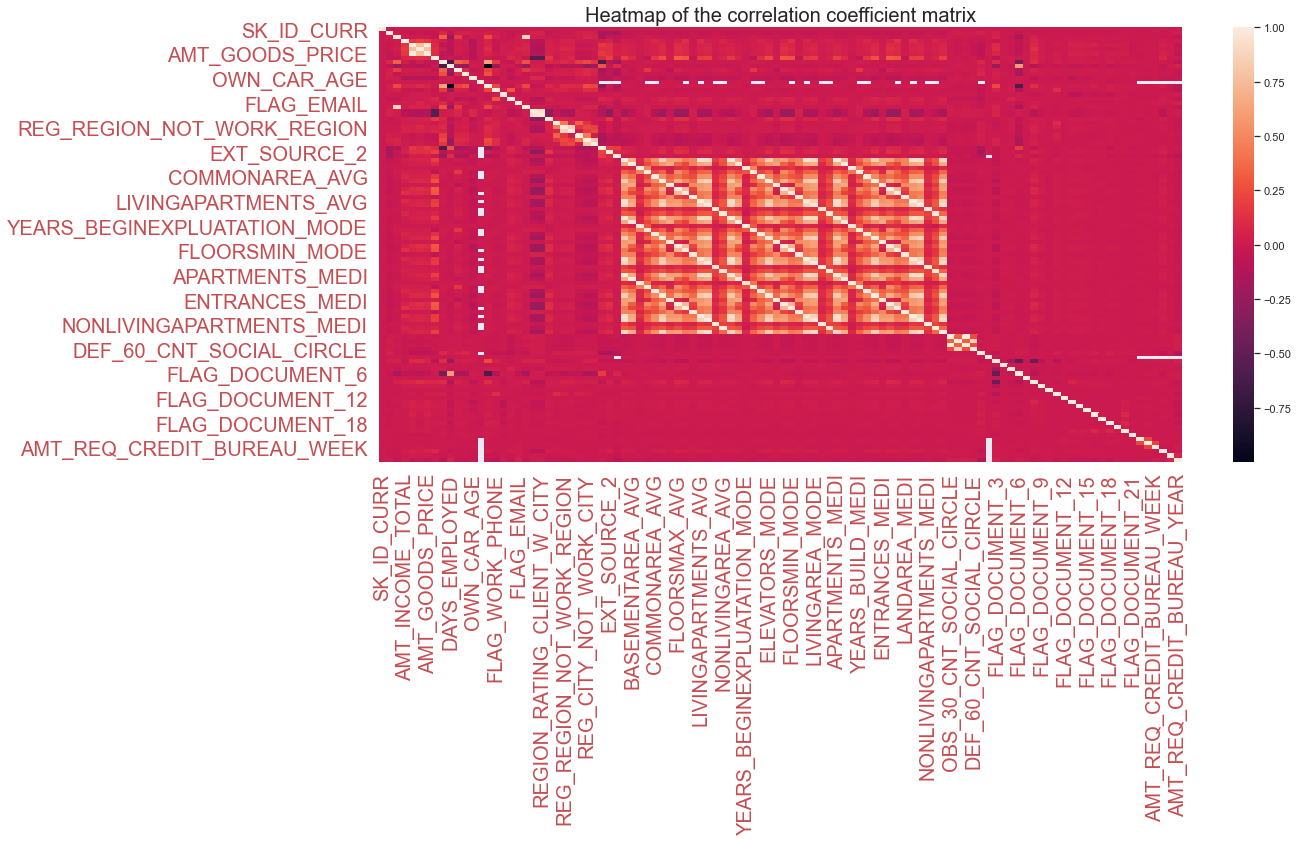

In [9]:
corr = pd.DataFrame.corr(application_train)
plt.figure(figsize = (18, 8))
plt.title("Heatmap of the correlation coefficient matrix", fontsize = 20)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 20, colors = 'r')
sns.heatmap(corr)
plt.show()

## 4. Top 10 features that have a high correlation with the target variable

In [10]:
top_features = corr.nlargest(11, 'TARGET')['TARGET']
top_features.drop('TARGET').to_frame()

,TARGET
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346
DAYS_REGISTRATION,0.041975


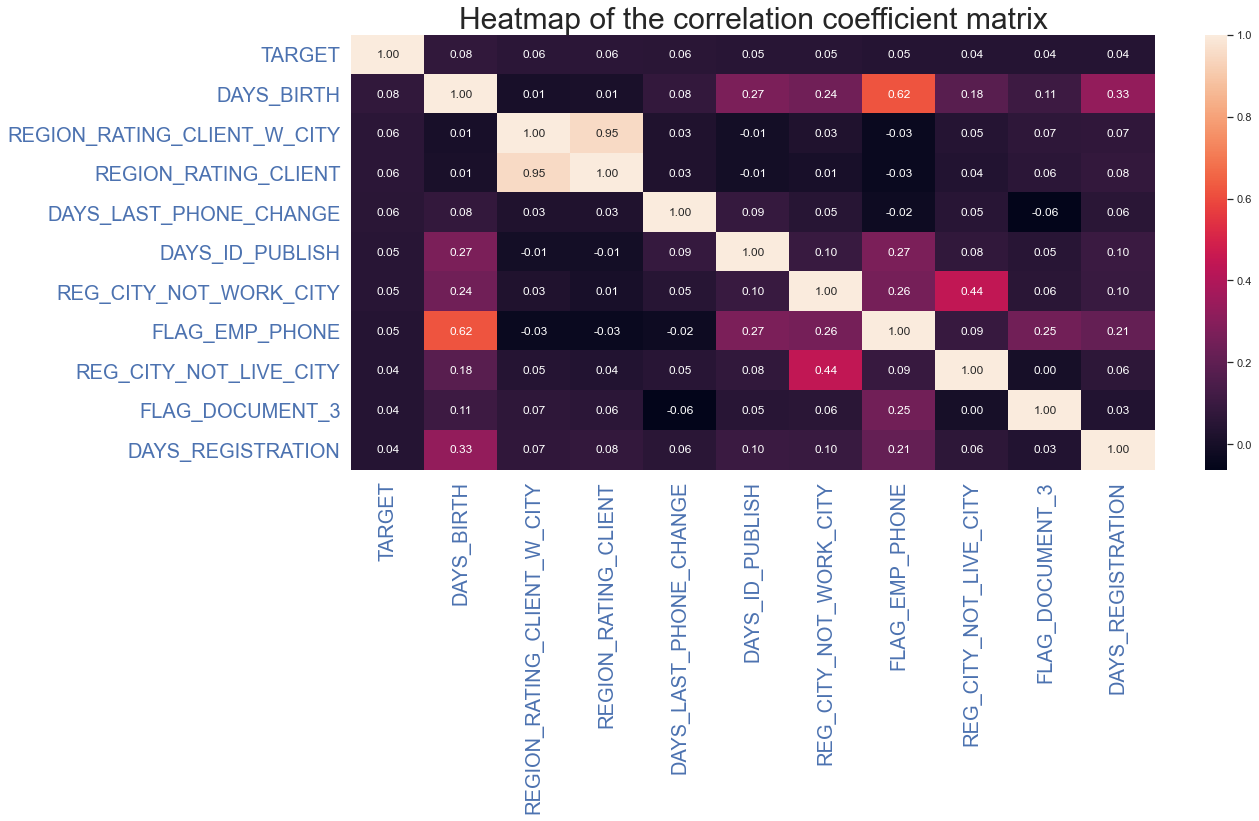

In [11]:
top_corr = pd.DataFrame.corr(application_train[top_features.index])
plt.figure(figsize = (18, 8))
plt.title("Heatmap of the correlation coefficient matrix", fontsize = 30)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 20, colors = 'b')
sns.heatmap(top_corr, annot=True, fmt='.2f')
plt.show()

<div class = "alert alert-warning">
<h2>These features will be analyzed to see how they affect the target </h2>
</div>

## 5. DAYS_BIRTH
**Client's age in days at the time of application**

<AxesSubplot:ylabel='Frequency'>

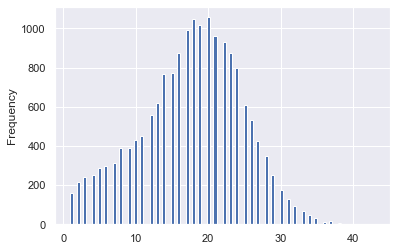

In [12]:
application_train['DAYS_BIRTH'].value_counts().plot.hist(bins = 100)

In [13]:
application_train['DAYS_BIRTH'].describe().to_frame()

,DAYS_BIRTH
count,307511.000000
mean,-16036.995067
std,4363.988632
min,-25229.000000
25%,-19682.000000
50%,-15750.000000
75%,-12413.000000
max,-7489.000000


### **All values are negative which mean that all samples are borned before application**

In [14]:
application_train['DAYS_BIRTH'].value_counts().to_frame()

,DAYS_BIRTH
-13749,43
-13481,42
-18248,41
-10020,41
-15771,40
...,...
-25032,1
-7956,1
-8001,1
-7861,1


### There are 17460 differents day-age among 307511 people

In [15]:
application_train.groupby(['DAYS_BIRTH', 'TARGET']).size().reset_index(name = 'Size')

,DAYS_BIRTH,TARGET,Size
0,-25229,0,1
1,-25201,0,2
2,-25200,0,1
3,-25197,0,2
4,-25196,0,4
...,...,...,...
29685,-7678,0,2
29686,-7678,1,1
29687,-7676,0,2
29688,-7673,0,1


### Graph 

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

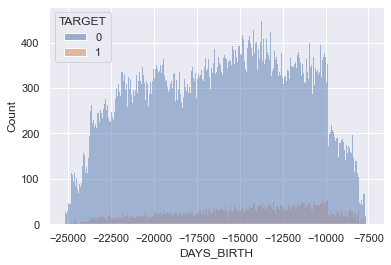

In [16]:
sns.histplot(data = application_train, x = 'DAYS_BIRTH', hue = 'TARGET', bins = 1000)

<div class = "alert alert-info">
<h3>According to the histogram, most clients who have payment difficulties, born at least 10000 days before the appication. This means that people who are older than 27 years old tend to have more difficulties in payment. </h3>
</div>

## 6. REGION_RATING_CLIENT_W_CITY
**The company rating of the region where client lives with taking city into account (1,2,3)**

<AxesSubplot:ylabel='REGION_RATING_CLIENT_W_CITY'>

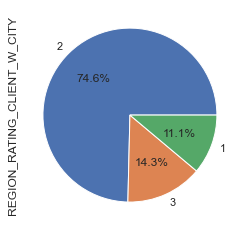

In [17]:
application_train['REGION_RATING_CLIENT_W_CITY'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='count'>

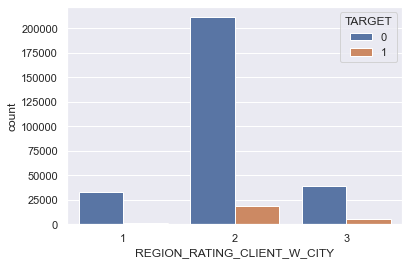

In [18]:
sns.countplot(x = 'REGION_RATING_CLIENT_W_CITY', hue = 'TARGET', data = application_train)

<div class = "alert alert-danger">
<h3>Clients with payment difficulties mostly live in mid-rating city according to the graph above. However, graphs below show that this is only becaue most clients are from the second city.</h3>
</div>

In [19]:
ratio = application_train.groupby(['TARGET', 'REGION_RATING_CLIENT_W_CITY']).size().reset_index(name = 'Size')
ratio

,TARGET,REGION_RATING_CLIENT_W_CITY,Size
0,0,1,32513
1,0,2,211314
2,0,3,38859
3,1,1,1654
4,1,2,18170
5,1,3,5001


array([<AxesSubplot:ylabel='Size'>], dtype=object)

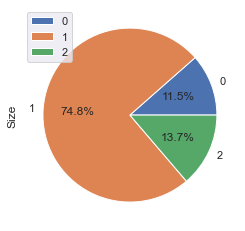

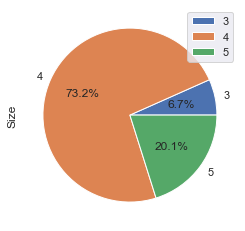

In [20]:
percent0 = ratio[:3]['Size']/ratio[ratio['TARGET'] == 0]['Size'].sum()
percent1 = ratio[3:]['Size']/ratio[ratio['TARGET'] == 1]['Size'].sum()
pd.DataFrame(percent0).plot.pie(autopct="%.1f%%", subplots=True)
pd.DataFrame(percent1).plot.pie(autopct="%.1f%%", subplots=True)

<div class = "alert alert-info">
<h3>Two pie charts show that 74.8% samples who have payment difficulties are from the mid-rating city and 73.2% people who don't have any difficulties are from here. This values are almost the same which means that living in the second city is not the factor that affect the target variable.</h3>
</div>

## 7. REGION_RATING_CLIENT
**The company rating of the region where client lives (1,2,3)**

<AxesSubplot:ylabel='REGION_RATING_CLIENT'>

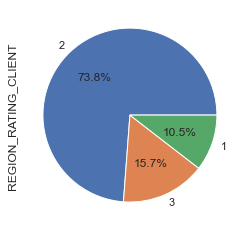

In [21]:
application_train['REGION_RATING_CLIENT'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Bar graph 

<AxesSubplot:xlabel='REGION_RATING_CLIENT', ylabel='count'>

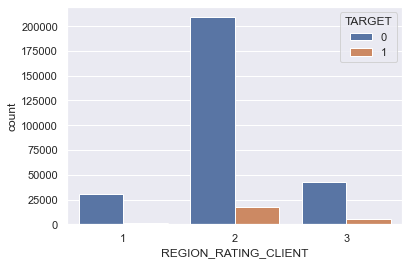

In [22]:
sns.countplot(x = 'REGION_RATING_CLIENT', hue = 'TARGET', data = application_train)

In [23]:
ratio2 = application_train.groupby(['TARGET', 'REGION_RATING_CLIENT']).size().reset_index(name = 'Size')
ratio2

,TARGET,REGION_RATING_CLIENT,Size
0,0,1,30645
1,0,2,209077
2,0,3,42964
3,1,1,1552
4,1,2,17907
5,1,3,5366


array([<AxesSubplot:ylabel='Size'>], dtype=object)

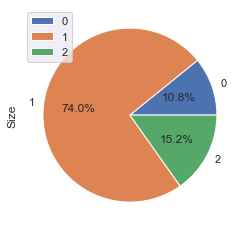

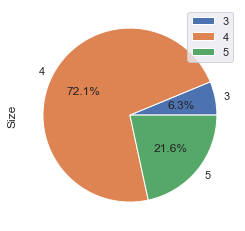

In [24]:
percent20 = ratio2[:3]['Size']/ratio2[ratio2['TARGET'] == 0]['Size'].sum()
percent21 = ratio2[3:]['Size']/ratio2[ratio2['TARGET'] == 1]['Size'].sum()
pd.DataFrame(percent20).plot.pie(autopct="%.1f%%", subplots=True, normalize=False)
pd.DataFrame(percent21).plot.pie(autopct="%.1f%%", subplots=True, normalize=False)

<div class = "alert alert-info">
<h3>This parameter is quite similar to the previous one. The percentage of people who live in mid-rating region is almost the same regarless they have payment difficulties. </h3>
</div>

## 8. DAYS_LAST_PHONE_CHANGE
**How many days before application did client change phone**

<AxesSubplot:ylabel='Density'>

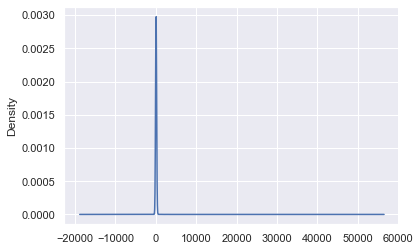

In [25]:
application_train['DAYS_LAST_PHONE_CHANGE'].value_counts().plot.kde()

In [26]:
application_train.groupby(['DAYS_LAST_PHONE_CHANGE', 'TARGET']).size().reset_index(name = 'Size')

,DAYS_LAST_PHONE_CHANGE,TARGET,Size
0,-4292.0,0,1
1,-4185.0,0,1
2,-4173.0,0,1
3,-4153.0,0,1
4,-4131.0,0,1
...,...,...,...
6725,-2.0,1,143
6726,-1.0,0,2562
6727,-1.0,1,250
6728,0.0,0,34031


### Graph 

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Count'>

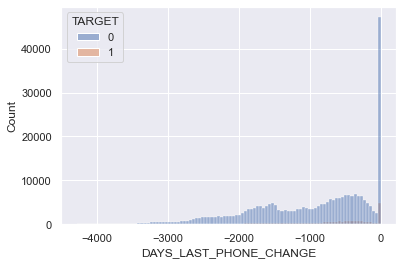

In [27]:
sns.histplot(data = application_train, x = 'DAYS_LAST_PHONE_CHANGE', hue = 'TARGET', bins = 100)

In [28]:
application_train[application_train['DAYS_LAST_PHONE_CHANGE'] == 0]['DAYS_LAST_PHONE_CHANGE'].count()/len(application_train['DAYS_LAST_PHONE_CHANGE'])*100

12.250618677055455

<div class = "alert alert-info">
<h3>The graphs show that most samples(12.2506%) change their phone at the time of application</h3>
</div>

## 9. DAYS_ID_PUBLISH
**How many days before the application did client change the identity document with which he applied for the loan**

<AxesSubplot:ylabel='Frequency'>

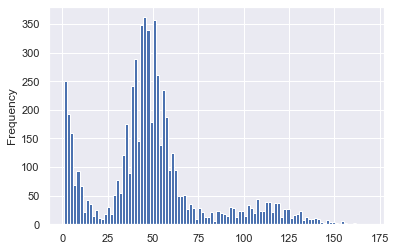

In [29]:
application_train['DAYS_ID_PUBLISH'].value_counts().plot.hist(bins = 100)

In [30]:
application_train.groupby(['DAYS_ID_PUBLISH', 'TARGET']).size().reset_index(name = 'Size')

,DAYS_ID_PUBLISH,TARGET,Size
0,-7197,0,1
1,-6551,0,1
2,-6383,0,1
3,-6337,0,1
4,-6274,0,1
...,...,...,...
11548,-2,1,6
11549,-1,0,56
11550,-1,1,8
11551,0,0,14


### Bar graph 

<AxesSubplot:xlabel='DAYS_ID_PUBLISH', ylabel='Count'>

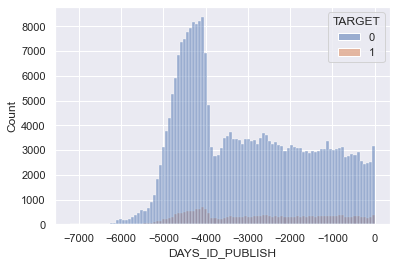

In [31]:
sns.histplot(data = application_train, x = 'DAYS_ID_PUBLISH', hue = 'TARGET', bins = 100)

<div class = "alert alert-danger">
<h3>The graphs show that samples who change the identity document with which he applied for the loan more than 4000 days  after application is more likely hard to pay</h3>
</div>

## 10. REG_CITY_NOT_WORK_CITY
**Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)**

<AxesSubplot:ylabel='REG_CITY_NOT_WORK_CITY'>

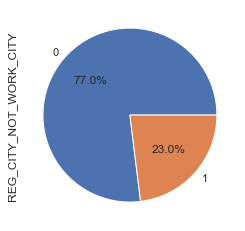

In [32]:
application_train['REG_CITY_NOT_WORK_CITY'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [33]:
application_train.groupby(['REG_CITY_NOT_WORK_CITY', 'TARGET']).size().reset_index(name = 'Size')

,REG_CITY_NOT_WORK_CITY,TARGET,Size
0,0,0,219339
1,0,1,17305
2,1,0,63347
3,1,1,7520


### Bar graph

<AxesSubplot:xlabel='REG_CITY_NOT_WORK_CITY', ylabel='count'>

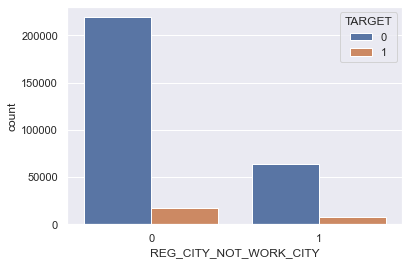

In [34]:
sns.countplot(x = 'REG_CITY_NOT_WORK_CITY', hue = 'TARGET', data = application_train)

<div class = "alert alert-danger">
<h3>The graphs show that most people have permanent address match contact address. Surprisingly, the ratio of client have difficulties that have match address seems to be a little higher than the other.</h3>
</div>

## 11. FLAG_EMP_PHONE
**Did client provide work phone (1=YES, 0=NO)**

<AxesSubplot:ylabel='FLAG_EMP_PHONE'>

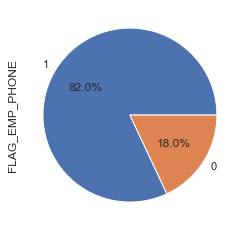

In [35]:
application_train['FLAG_EMP_PHONE'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [36]:
application_train.groupby(['FLAG_EMP_PHONE', 'TARGET']).size().reset_index(name = 'Size')

,FLAG_EMP_PHONE,TARGET,Size
0,0,0,52395
1,0,1,2991
2,1,0,230291
3,1,1,21834


### Bar graph

<AxesSubplot:xlabel='FLAG_EMP_PHONE', ylabel='count'>

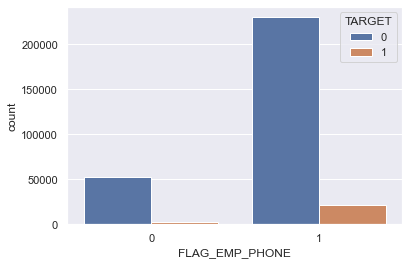

In [37]:
sns.countplot(x = 'FLAG_EMP_PHONE', hue = 'TARGET', data = application_train)

<div class = "alert alert-danger">
<h3>It seems that clients who provide work phone have more difficulties in payment.</h3>
</div>

## 12. REG_CITY_NOT_LIVE_CITY
**Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)**

<AxesSubplot:ylabel='REG_CITY_NOT_LIVE_CITY'>

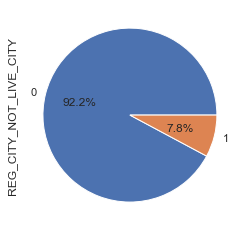

In [38]:
application_train['REG_CITY_NOT_LIVE_CITY'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [39]:
application_train.groupby(['REG_CITY_NOT_LIVE_CITY', 'TARGET']).size().reset_index(name = 'Size')

,REG_CITY_NOT_LIVE_CITY,TARGET,Size
0,0,0,261586
1,0,1,21886
2,1,0,21100
3,1,1,2939


### Bar graph

<AxesSubplot:xlabel='REG_CITY_NOT_LIVE_CITY', ylabel='count'>

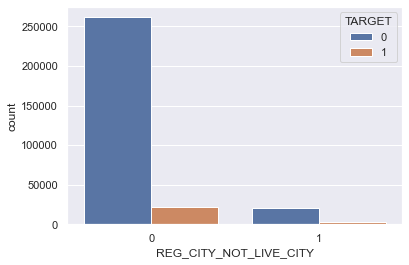

In [40]:
sns.countplot(x = 'REG_CITY_NOT_LIVE_CITY', hue = 'TARGET', data = application_train)

<div class = "alert alert-danger">
<h3>According to the graphs, most people have permanent address match contact address is more likely to have difficulties </h3>
</div>

## 13. FLAG_DOCUMENT_3
**Did client provide document 3**

<AxesSubplot:ylabel='FLAG_DOCUMENT_3'>

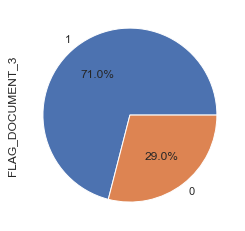

In [41]:
application_train['FLAG_DOCUMENT_3'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [42]:
application_train.groupby(['FLAG_DOCUMENT_3', 'TARGET']).size().reset_index(name = 'Size')

,FLAG_DOCUMENT_3,TARGET,Size
0,0,0,83658
1,0,1,5513
2,1,0,199028
3,1,1,19312


### Bar graph

<AxesSubplot:xlabel='FLAG_DOCUMENT_3', ylabel='count'>

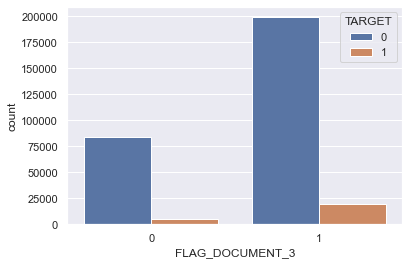

In [43]:
sns.countplot(x = 'FLAG_DOCUMENT_3', hue = 'TARGET', data = application_train)

<div class = "alert alert-info">
<h3>Clients who provide document 3 have more percentage to have payment difficulties according to the graph.</h3>
</div>

## 14. DAYS_REGISTRATION
**How many days before the application did client change his registration**

<AxesSubplot:ylabel='Frequency'>

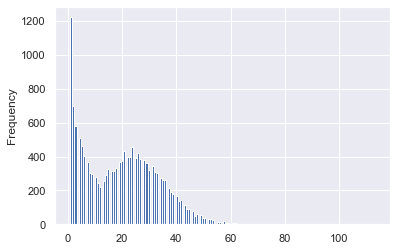

In [44]:
application_train['DAYS_REGISTRATION'].value_counts().plot.hist(bins = 150)

In [45]:
application_train.groupby(['DAYS_REGISTRATION', 'TARGET']).size().reset_index(name = 'Size')

,DAYS_REGISTRATION,TARGET,Size
0,-24672.0,0,1
1,-23738.0,0,1
2,-23416.0,0,1
3,-22928.0,1,1
4,-22858.0,0,1
...,...,...,...
25568,-2.0,1,16
25569,-1.0,0,96
25570,-1.0,1,17
25571,0.0,0,71


### Bar graph

<AxesSubplot:xlabel='DAYS_REGISTRATION', ylabel='Count'>

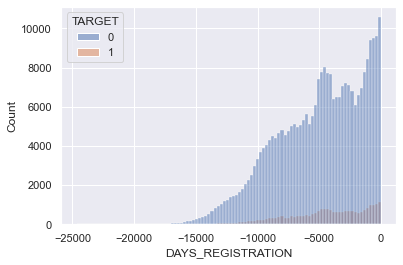

In [46]:
sns.histplot(data = application_train, x = 'DAYS_REGISTRATION', hue = 'TARGET', bins = 100)

<div class = "alert alert-info">
<h3>The amount of clients who have payment difficulties reduce gradually since the 5000 days before application.</h3>
</div>